In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import socket
from glob import glob

import oae_smyle
import config
import xarray as xr

this_notebook = 'run-cesm.ipynb'
assert 'cheyenne' in socket.gethostname(), (
    'this notebook must be run on cheyenne login node'
)


# Run CESM 
1. Change **project number** in config.py

In [3]:
# forcing files
alk_forcing_spec = 'North_Pacific_basin'
year_spec        = '5year'
forcing_files = sorted(
    glob(f'/glade/scratch/eyankovsky/oae-dor-global-efficiency/data/{alk_forcing_spec}_{year_spec}/alk-forcing-{alk_forcing_spec}.*.nc')
)
# forcing_files = sorted(
#     glob(f'/glade/scratch/eyankovsky/oae-dor-global-efficiency/data/Labrador_ensemble/alk-forcing-{alk_forcing_spec}.*.nc')
# )
run_only_index_list = [i for i in range(len(forcing_files))]
    
len(forcing_files)

#forcing_files

2

In [4]:
ds = xr.open_dataset(forcing_files[0])

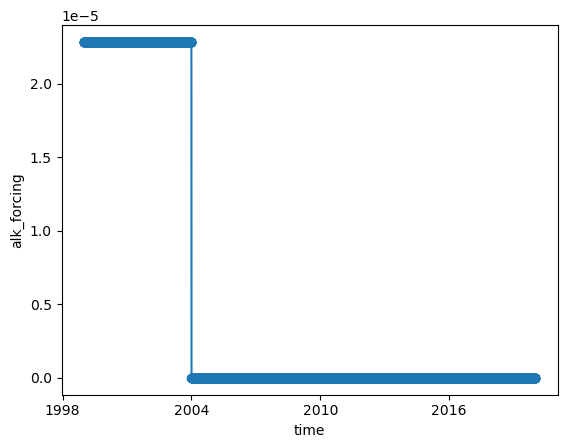

In [5]:
ds.alk_forcing.sum(['X', 'Y'])[0:].plot(marker='o')

In [6]:
clobber = True

run_settings = dict(
    stop_n=10,                #10 years
    stop_option="nyear",
    job_queue="regular",
    wallclock="12:00:00",
    resubmit=1,              #2 would give 30 years of output
)

#run_only_index_list = [0, 16, 36, 63] # use this list to run only select indexes 
#run_only_index_list = [105, 155] # use this list to run only select indexes 
#run_only_index_list = [6, 22] # use this list to run only select indexes 

for n, f in enumerate(forcing_files):

    #if n not in run_only_index_list:
    #    continue

    alk_forcing = os.path.basename(f).replace('.nc', '')

    case = f"smyle-fosi.{alk_forcing_spec}.{alk_forcing}"
    oae_smyle.create_clone(
        case, 
        alk_forcing_file=f, 
        submit=True, 
        clobber=clobber, 
        curtail_output=True,
        **run_settings
    )
print('done')

 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-5year from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-5year/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-5year/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-5year/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.006-5year
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:02:54 atm 
   Calling /glade/work/klindsa


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:16:37 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 21:16:37 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 21:16:37 ice 
   Cal

submit_jobs case.run
Submit job case.run
Submit job case.st_archive


Submitted job id is 4486967.chadmin1.ib0.cheyenne.ucar.edu
Submitting job script qsub -q regular -l walltime=12:00:00 -A P93300612  -W depend=afterok:4486967.chadmin1.ib0.cheyenne.ucar.edu -v ARGS_FOR_SCRIPT='--resubmit' case.st_archive
Submitted job id is 4486968.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4486967.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4486968.chadmin1.ib0.cheyenne.ucar.edu
 Successfully created new case smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.022-5year from clone case g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.SMYLE.005 
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)


/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.022-5year/env_mach_specific.xml already exists, delete to replace
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.022-5year/env_mach_specific.xml already exists, delete to replace


job is case.run USER_REQUESTED_WALLTIME None USER_REQUESTED_QUEUE regular WALLTIME_FORMAT %H:%M:%S
Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run


INFO: Running consistency check for /glade/u/home/eyankovsky/CWorthy/SourceMods-OAE/src.pop.curtail-output/diagnostics_latest.yaml
INFO: Writing /glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.022-5year/SourceMods/src.pop/diagnostics_latest.json


Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
Machine/Decomp/Pes configuration has already been done ...skipping
If an old case build already exists, might want to run 'case.build --clean' before building
You can now run './preview_run' to get more info on how your case will be run
checkpoint 1
/glade/work/bachman/oae-dor-global-efficiency/cesm-cases/smyle-fosi.North_Pacific_basin.alk-forcing-North_Pacific_basin.022-5year
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:17:18 atm 
   Calling /glade/work/klindsa


env_batch.xml appears to have changed, regenerating batch scripts
manual edits to these file will be lost!



Creating batch scripts
Writing case.run script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.case.run
Creating file .case.run
Writing case.st_archive script from input template /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/config/cesm/machines/template.st_archive
Creating file case.st_archive
Setting Environment OMP_STACKSIZE=1024M
Setting Environment TMPDIR=/glade/scratch/bachman
Setting Environment MPI_TYPE_DEPTH=16
Setting Environment MPI_IB_CONGESTED=1
Setting resource.RLIMIT_STACK to -1 from (307200000, -1)
GET_REFCASE is false, the user is expected to stage the refcase to the run directory.
Creating component namelists
  2023-12-29 21:30:08 atm 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/data_comps_mct/datm/cime_config/buildnml
  2023-12-29 21:30:08 lnd 
   Calling /glade/work/klindsay/cesm2_tags/cesm2.2.0/cime/src/components/stub_comps_mct/slnd/cime_config/buildnml
  2023-12-29 21:30:08 ice 
   Cal

submit_jobs case.run
Submit job case.run


Submitted job id is 4486990.chadmin1.ib0.cheyenne.ucar.edu
Submitting job script qsub -q regular -l walltime=12:00:00 -A P93300612  -W depend=afterok:4486990.chadmin1.ib0.cheyenne.ucar.edu -v ARGS_FOR_SCRIPT='--resubmit' case.st_archive


Submit job case.st_archive


Submitted job id is 4486991.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.run with id 4486990.chadmin1.ib0.cheyenne.ucar.edu
Submitted job case.st_archive with id 4486991.chadmin1.ib0.cheyenne.ucar.edu
done


In [16]:
#FG_CO2

In [17]:
print('done')

done


In [101]:
######## run cesm
# clobber = True

# # use this list to run only select indexes 
# run_only_index_list = [forcing_id]  

# for n, f in enumerate(forcing_files):

#     if n not in run_only_index_list:
#         continue
#     print(n,f)

#     # string of the month: '01'
#     month_str = f[-5:-3]

#     run_settings = dict(
#         refdate="0347-" + month_str + "-01",  # change this
#         #refdate="0347-01-01",  # change this
#         stop_n=2,
#         stop_option="nyear",
#         job_queue="economy",
#         #job_queue="regular",
#         wallclock="01:00:00",
#         #wallclock="01:00:00",
#         resubmit=0, 
#     )

#     alk_forcing = os.path.basename(f).replace('.nc', '')
#     case = f"smyle-fosi.{alk_forcing_spec}.{alk_forcing}.test"

#     oae_smyle.create_clone(
#         case, 
#         alk_forcing_file=f, 
#         submit=False, 
#         clobber=clobber, 
#         curtail_output=True,
#         **run_settings
#     ) 